In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
xi, xf, N = -5, 5, 1001
x = np.linspace(xi,xf,N)
dx = np.mean(x[1:]-x[:-1])
P = -1j*(np.diag(np.ones(N-1),1) - np.diag(np.ones(N))) / dx
P = (P + P.T.conj())/2
PP = -(np.diag(np.ones(N-1),-1) - 2 * np.diag(np.ones(N)) + np.diag(np.ones(N-1),1))/(dx**2)
X = np.diag(x)

m = 1
def psi(phi):
    # N = quad(lambda x: np.exp(-(x+np.conj(x))), xi, xf)[0]
    psi0 = np.exp(-phi)
    N = np.vdot(psi0, psi0)
    return psi0 / np.sqrt(N)

Check whether it works for the simplest example, the QHO

-3.1249507791169473e-06


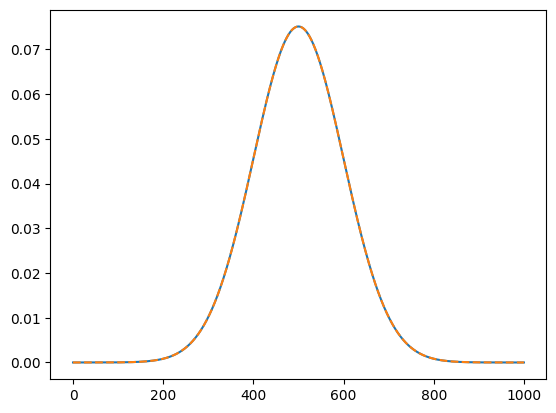

In [4]:
H = PP/2 + X@X/2 - np.eye(N)/2

eigvals, eigvecs = np.linalg.eigh(H)

psi0 = psi(x**2/2)
plt.plot(psi0)
plt.plot(eigvecs[:,0],ls="--")
print(eigvals[0])

Next let us consider examples with real Actions

-4.196435793864082e-05


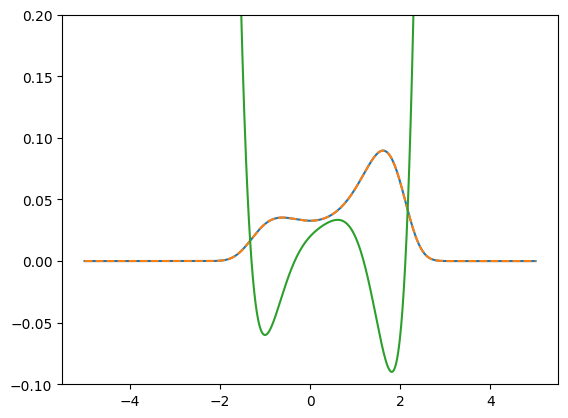

In [7]:
H = PP/2 + 0.5*np.diag(x**6-2*x**5-x**4+2*x**3-2*x**2+2*x+1)

eigvals, eigvecs = np.linalg.eigh(H)

psi0 = psi(x**4/4-x**3/3-x**2/2)
plt.plot(x,psi0)
plt.plot(x,-eigvecs[:,0],ls="--")
plt.plot(x,4e-2*(x**6-2*x**5-x**4+2*x**3-2*x**2+2*x+1)/2)
plt.ylim(-0.1,0.2)
print(eigvals[0])

Now let us try with complex actions and see if it still remains the ground state

0.008111832116450867


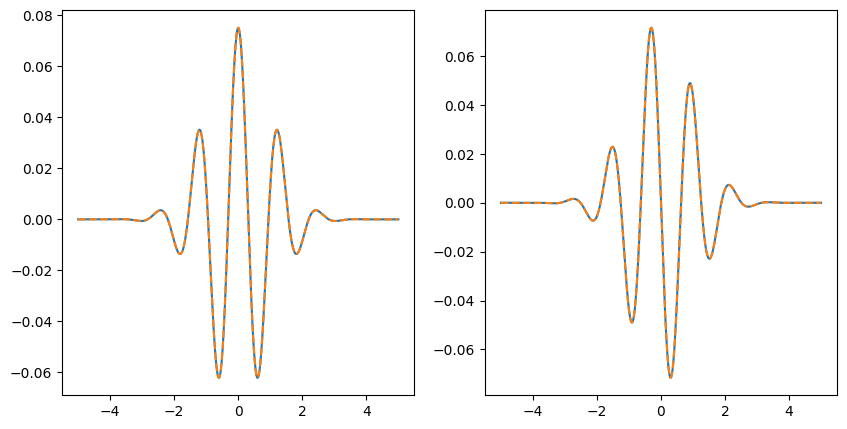

In [8]:
k = 5
H = PP/2 + k*P+ 0.5*np.diag(x**2+k**2-1)

eigvals, eigvecs = np.linalg.eigh(H)

psi0 = psi(x**2/2+1j*k*x)

fig, ax = plt.subplots(ncols=2,figsize=(10,5))

i = 0

gauge = np.exp(-1j*np.angle(eigvecs[N//2,0]))
eigvecs[:,i] *= gauge

ax[0].plot(x,psi0.real)
ax[0].plot(x,eigvecs[:,i].real,ls="--")

ax[1].plot(x,psi0.imag)
ax[1].plot(x,eigvecs[:,i].imag,ls="--")
print(eigvals[i])

0.0013813931801383136


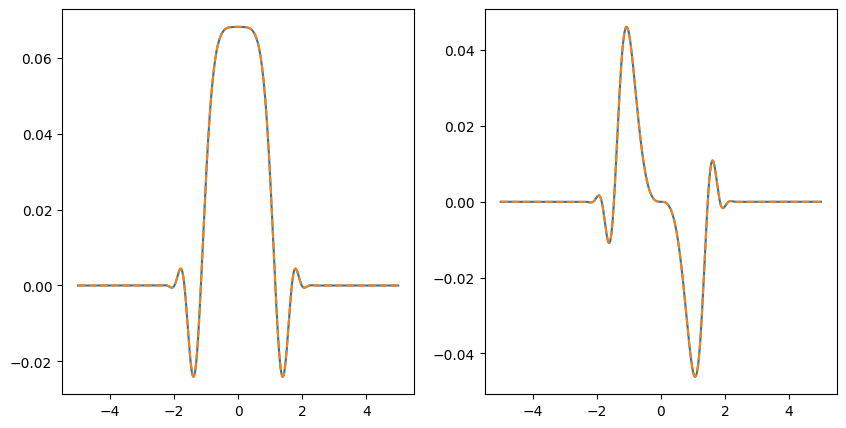

In [9]:
k = 3
H = (PP + np.diag(x**6+k**2*x**4-3*x**2-2j*k*x) +2*k*np.diag(x**2)@P)/2
H = (H + H.T.conj())/2

eigvals, eigvecs = np.linalg.eigh(H)

psi0 = psi(x**4/4+1j*k*x**3/3)

fig, ax = plt.subplots(ncols=2,figsize=(10,5))

i = 0

gauge = np.exp(-1j*np.angle(eigvecs[N//2,0]))
eigvecs[:,i] *= gauge

ax[0].plot(x,psi0.real)
ax[0].plot(x,eigvecs[:,i].real,ls="--")

ax[1].plot(x,psi0.imag)
ax[1].plot(x,eigvecs[:,i].imag,ls="--")
print(eigvals[i])

I guess this works for any wavefunction as long as you account for the branch cut for the complex continuation of the logarithm

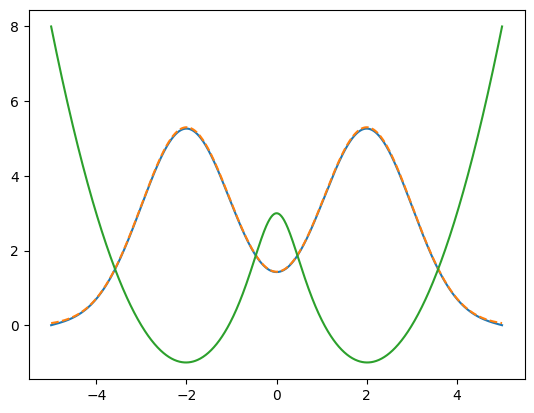

In [25]:
def V(x,a=2):
    y1 = x-a
    y2 = x+a
    e1 = np.exp(-y1**2/2)
    e2 = np.exp(-y2**2/2)
    f = e1 + e2
    fp = -e1*y1 - e2*y2
    fpp = e1*(y1**2-1) + e2*(y2**2-1)
    phip = -fp/f
    phipp = -fpp/f + fp**2/f**2
    return phip**2 - phipp

def wavefunc(x,a=2):
    y1 = x-a
    y2 = x+a
    e1 = np.exp(-y1**2/2)
    e2 = np.exp(-y2**2/2)
    return e1+e2

H = (PP + np.diag(V(x)))/2
eigvals, eigvecs = np.linalg.eigh(H)

plt.plot(x,-eigvecs[:,0]*1e2)
plt.plot(x,wavefunc(x)*5.3,ls="--")
plt.plot(x,V(x))

0.0054381388128386925


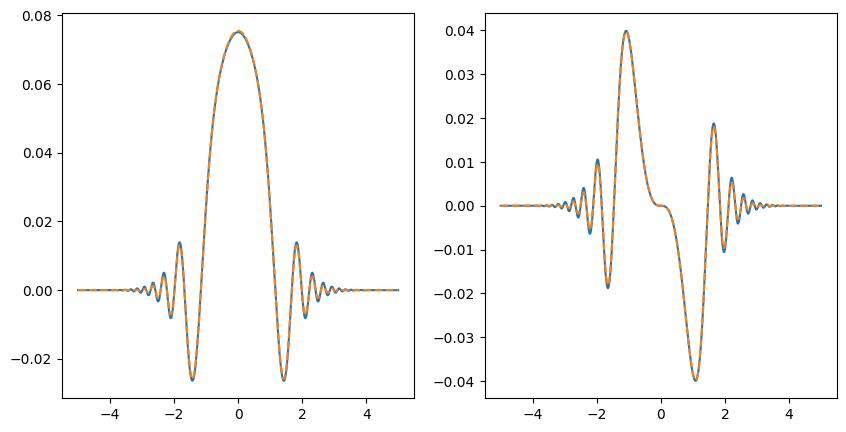

In [32]:
a, b, c = 1, 3, 0
H = (PP + np.diag((a*x)**2+(b*x**2-c)**2-a-2j*b*x) +2*np.diag(b*x**2-c)@P)/(2*a)
H = (H + H.T.conj())/2

eigvals, eigvecs = np.linalg.eigh(H)

psi0 = psi(a*x**2/2+1j*(b*x**3/3-c*x))

fig, ax = plt.subplots(ncols=2,figsize=(10,5))

i = 0

gauge = np.exp(-1j*np.angle(eigvecs[N//2,0]))
eigvecs[:,i] *= gauge

ax[0].plot(x,psi0.real)
ax[0].plot(x,eigvecs[:,i].real,ls="--")

ax[1].plot(x,psi0.imag)
ax[1].plot(x,eigvecs[:,i].imag,ls="--")
print(eigvals[i])